In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Salary Prediction of Data Professions.csv')

In [3]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
df.shape

(2639, 13)

In [5]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [8]:
print(df.duplicated().sum())

161


In [9]:
df.drop_duplicates(inplace=True)
df.shape

(2470, 13)

In [10]:
df['DOJ']= pd.to_datetime(df['DOJ'])
df['CURRENT DATE']= pd.to_datetime(df['CURRENT DATE'])

In [11]:
unique_designations= df['DESIGNATION'].unique()
print('Designations: ')
print(unique_designations)

unique_units= df['UNIT'].unique()
print('\n Units: ')
print(unique_units)

Designations: 
['Analyst' 'Senior Analyst' 'Associate' 'Senior Manager' 'Manager'
 'Director']

 Units: 
['Finance' 'IT' 'Marketing' 'Operations' 'Web' 'Management']


In [12]:
from sklearn.preprocessing import LabelEncoder

encoded= LabelEncoder()
df['DESIGNATION']= encoded.fit_transform(df['DESIGNATION'])
df['UNIT']= encoded.fit_transform(df['UNIT'])

In [13]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [14]:
df.drop(columns=['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE'], inplace=True)
df.head()

,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,21.0,44570,0,24.0,6.0,2.0,0
2,0,21.0,40955,0,23.0,7.0,3.0,0
3,0,22.0,45550,1,22.0,8.0,3.0,0
6,0,22.0,40339,3,19.0,11.0,5.0,0
8,4,28.0,63478,4,20.0,10.0,3.0,1


In [15]:
#checking correlation between features
features= [ 'DESIGNATION','AGE', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS','PAST EXP']
target= df['SALARY']

for feature in features:
    feature_columns= df[feature]
    correlation= feature_columns.corr(target)

    print(f"Correalation between {feature} and Salary: {correlation}")

Correalation between DESIGNATION and Salary: 0.5188140515195695
Correalation between AGE and Salary: 0.8693565135243136
Correalation between UNIT and Salary: -0.02083028585683726
Correalation between LEAVES USED and Salary: 0.004596335313600593
Correalation between LEAVES REMAINING and Salary: -0.004596335313600582
Correalation between RATINGS and Salary: 0.016123449458902275
Correalation between PAST EXP and Salary: 0.8510257365424908


In [16]:
df.drop(columns=['UNIT', 'LEAVES REMAINING'], inplace=True)
df.head()

,DESIGNATION,AGE,SALARY,LEAVES USED,RATINGS,PAST EXP
0,0,21.0,44570,24.0,2.0,0
2,0,21.0,40955,23.0,3.0,0
3,0,22.0,45550,22.0,3.0,0
6,0,22.0,40339,19.0,5.0,0
8,4,28.0,63478,20.0,3.0,1


In [17]:
X= df.drop(columns=['SALARY'])
y= df['SALARY']

In [18]:
X.head()

,DESIGNATION,AGE,LEAVES USED,RATINGS,PAST EXP
0,0,21.0,24.0,2.0,0
2,0,21.0,23.0,3.0,0
3,0,22.0,22.0,3.0,0
6,0,22.0,19.0,5.0,0
8,4,28.0,20.0,3.0,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score 

import matplotlib.pyplot as plt

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

Linear Regression

In [22]:
lr= LinearRegression()

lr.fit(X_train_scaled, y_train)

lr_prediction= lr.predict(X_test_scaled)

lr_mse= mean_squared_error(y_test, lr_prediction)
lr_mae = mean_absolute_error(y_test, lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2= r2_score(y_test, lr_prediction)

print("Linear Regressor:")
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("R2 score: ", lr_r2)

Linear Regressor:
Mean Squared Error (MSE): 299465439.0223064
Mean Absolute Error (MAE): 11761.93980294405
Root Mean Squared Error (RMSE): 17305.069749131508
R2 score:  0.7693791686771541


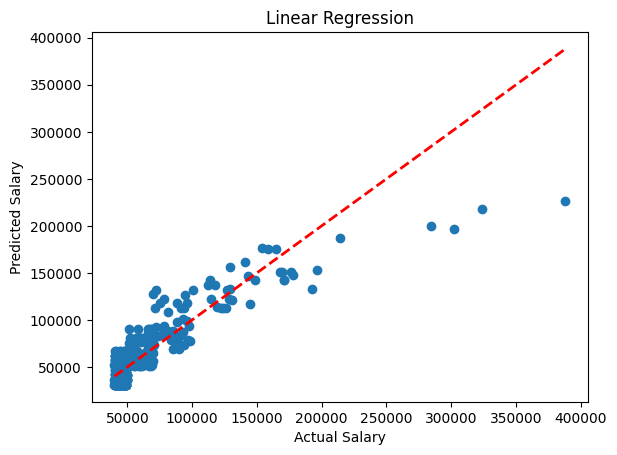

In [23]:
plt.scatter(y_test, lr_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Linear Regression")
plt.show()

Random Forest Regressor

In [24]:
rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train_scaled, y_train)

rf_prediction = rf_regressor.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_prediction)
rf_mae = mean_absolute_error(y_test, rf_prediction)
rf_rmse = np.sqrt(rf_mse)
rf_r2= r2_score(y_test, rf_prediction)

print("Random Forest Regressor:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R2 score: ", rf_r2)

Random Forest Regressor:
Mean Squared Error (MSE): 85367074.2689133
Mean Absolute Error (MAE): 4445.541898743578
Root Mean Squared Error (RMSE): 9239.430408251003
R2 score:  0.9342581043750112


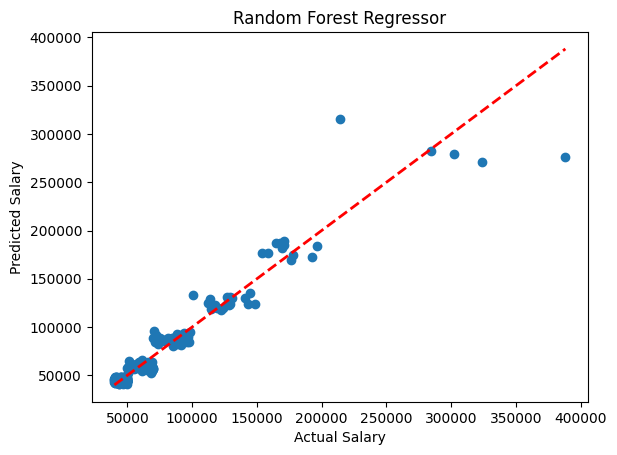

In [25]:
plt.scatter(y_test, rf_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest Regressor")
plt.show()

Support Vector Regressor

In [26]:
svr_regressor = SVR()

svr_regressor.fit(X_train_scaled, y_train)

svr_prediction = svr_regressor.predict(X_test_scaled)


svr_mae = mean_absolute_error(y_test, svr_prediction)
svr_mse = mean_squared_error(y_test, svr_prediction)
svr_rmse = np.sqrt(svr_mse)
svr_r2= r2_score(y_test, svr_prediction)

print("\nSupport Vector Regressor:")
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("Root Mean Squared Error (RMSE):", svr_rmse)
print('R2 score: ', svr_r2)


Support Vector Regressor:
Mean Squared Error (MSE): 1426074763.618274
Mean Absolute Error (MAE): 14648.021884486292
Root Mean Squared Error (RMSE): 37763.40508505919
R2 score:  -0.09823206506871673


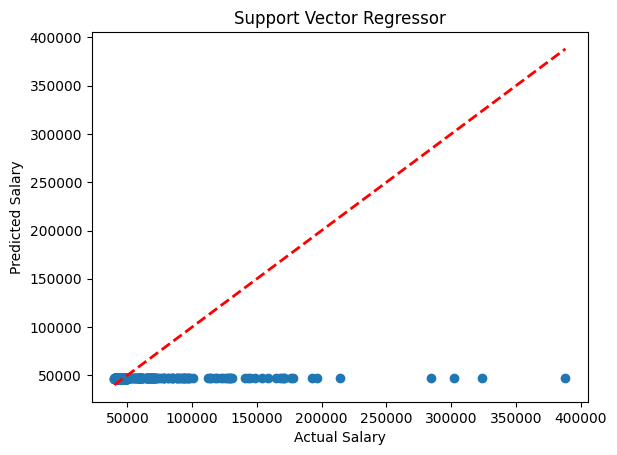

In [27]:
plt.scatter(y_test, svr_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Support Vector Regressor")
plt.show()

Gradient Boosting Regressor

In [28]:
gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train_scaled, y_train)

gb_prediction = gb_regressor.predict(X_test_scaled)

gb_mse = mean_squared_error(y_test, gb_prediction)
gb_mae = mean_absolute_error(y_test, gb_prediction)
gb_rmse = np.sqrt(gb_mse)
gb_r2= r2_score(y_test, gb_prediction)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("R2 Score: ", gb_r2)


Gradient Boosting Regressor:
Mean Squared Error (MSE): 105962557.6533836
Mean Absolute Error (MAE): 4429.9318654041945
Root Mean Squared Error (RMSE): 10293.811619287755
R2 Score:  0.9183973509100058


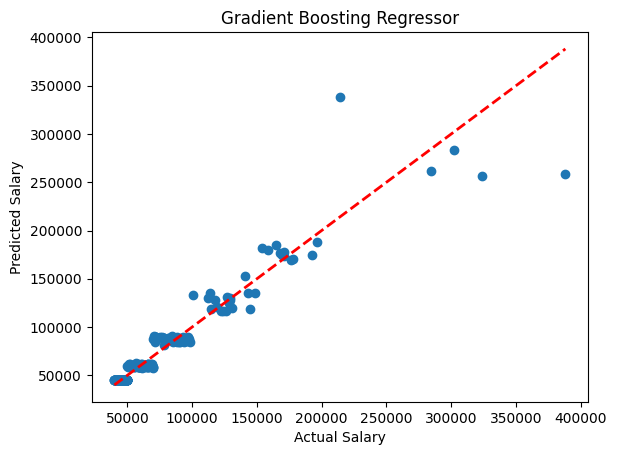

In [29]:
plt.scatter(y_test, gb_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Gradient Boosting Regressor")
plt.show()

K-Nearest Neighbors Regressor

In [30]:
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train_scaled, y_train)

knn_prediction = knn_regressor.predict(X_test_scaled)

knn_mse = mean_squared_error(y_test, knn_prediction)
knn_mae = mean_absolute_error(y_test, knn_prediction)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_prediction)

print("K-Nearest Neighbors Regressor:")
print("Mean Squared Error (MSE):", knn_mse)
print("Mean Absolute Error (MAE):", knn_mae)
print("Root Mean Squared Error (RMSE):", knn_rmse)
print("R2 score:", knn_r2)

K-Nearest Neighbors Regressor:
Mean Squared Error (MSE): 79938367.40615384
Mean Absolute Error (MAE): 4500.703643724696
Root Mean Squared Error (RMSE): 8940.825879422653
R2 score: 0.9384387967907539


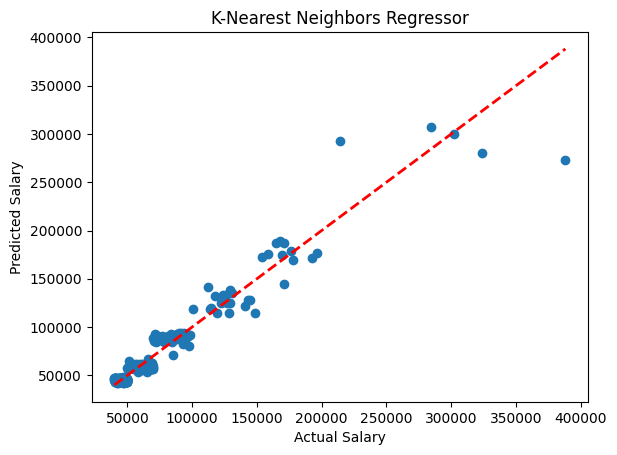

In [31]:
plt.scatter(y_test, knn_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("K-Nearest Neighbors Regressor")
plt.show()

Polynomial Regressor

In [32]:
# Define the degree of the polynomial
degree = 2  

# Create polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


poly_LR = LinearRegression()

poly_LR.fit(X_train_poly, y_train)

poly_prediction = poly_LR.predict(X_test_poly)


poly_mse = mean_squared_error(y_test, poly_prediction)
poly_mae = mean_absolute_error(y_test, poly_prediction)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, poly_prediction)

print("Polynomial Regression (Degree {}):".format(degree))
print("Mean Squared Error (MSE):", poly_mse)
print("Mean Absolute Error (MAE):", poly_mae)
print("Root Mean Squared Error (RMSE):", poly_rmse)
print("R2 score:", poly_r2)

Polynomial Regression (Degree 2):
Mean Squared Error (MSE): 130763411.5033516
Mean Absolute Error (MAE): 5538.288919427125
Root Mean Squared Error (RMSE): 11435.18305508712
R2 score: 0.8992980065881057


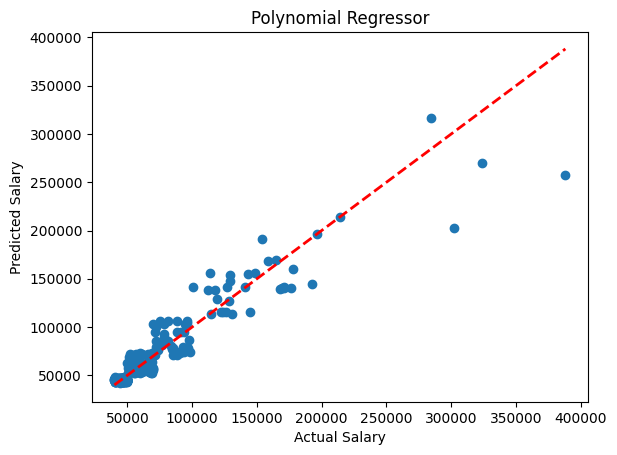

In [33]:
plt.scatter(y_test, poly_prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, c='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Polynomial Regressor")
plt.show()

Comparison

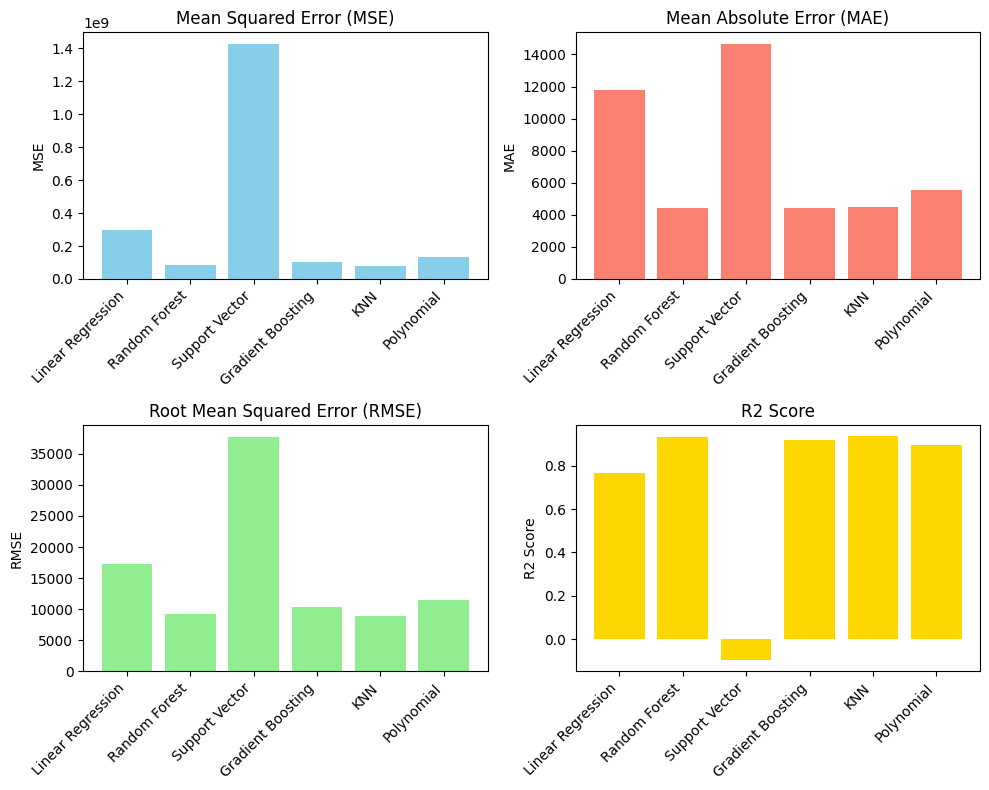

In [34]:
algorithms = ['Linear Regression', 'Random Forest', 'Support Vector', 'Gradient Boosting', 'KNN', 'Polynomial']
mse_values = [lr_mse, rf_mse, svr_mse, gb_mse, knn_mse, poly_mse]
mae_values = [lr_mae, rf_mae, svr_mae, gb_mae, knn_mae, poly_mae]
rmse_values = [lr_rmse, rf_rmse, svr_rmse, gb_rmse, knn_rmse, poly_rmse]
r2_values = [lr_r2, rf_r2, svr_r2, gb_r2, knn_r2, poly_r2]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Mean Squared Error (MSE)
axs[0, 0].bar(algorithms, mse_values, color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')

# Mean Absolute Error (MAE)
axs[0, 1].bar(algorithms, mae_values, color='salmon')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')

# Root Mean Squared Error (RMSE)
axs[1, 0].bar(algorithms, rmse_values, color='lightgreen')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# R2 score
axs[1, 1].bar(algorithms, r2_values, color='gold')
axs[1, 1].set_title('R2 Score')
axs[1, 1].set_ylabel('R2 Score')

# Rotating x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(algorithms, rotation=45, ha='right')

plt.tight_layout()
plt.show()